<p style="color:blue; font-family:Georgia; text-align:center; font-size:3em;">Weather History Data Cleaning</p>


# Table of Contents
1. [Intro](#1)
1. [Importing Libraries](#2)
1. [Loading Data and EDA](#3)
1. [Data inspection](#4)
1. [Save cleaned data](#5)


by : Ahmed Nabil Ibrahim Awaad

<a id="1"></a>
# INTRO

> Given a weather history data

*>* Required
* 1- Load the data and perform all necessary data cleaning and scaling.
* 2- Data inspection. Use any relevant functions that can help you to understand the data. Use any necessary visualization techniques to inspect your data


<a id="2"></a>
# Import Libraries

In [3]:
# import libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#settings
pd.set_option('display.max_columns', None)
%matplotlib inline

<a id="3"></a>
# Loading Data and EDA

In [4]:
weather_df = pd.read_csv("00_weatherHistory_raw.csv")
weather_df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [9]:
# get the shape of data
weather_df.shape

(96453, 12)

In [6]:
# get the basic information of data
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### we can notice that there are some missing values in the data and the date type is object not date

In [7]:
# get the number of missing values in each feature
weather_df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

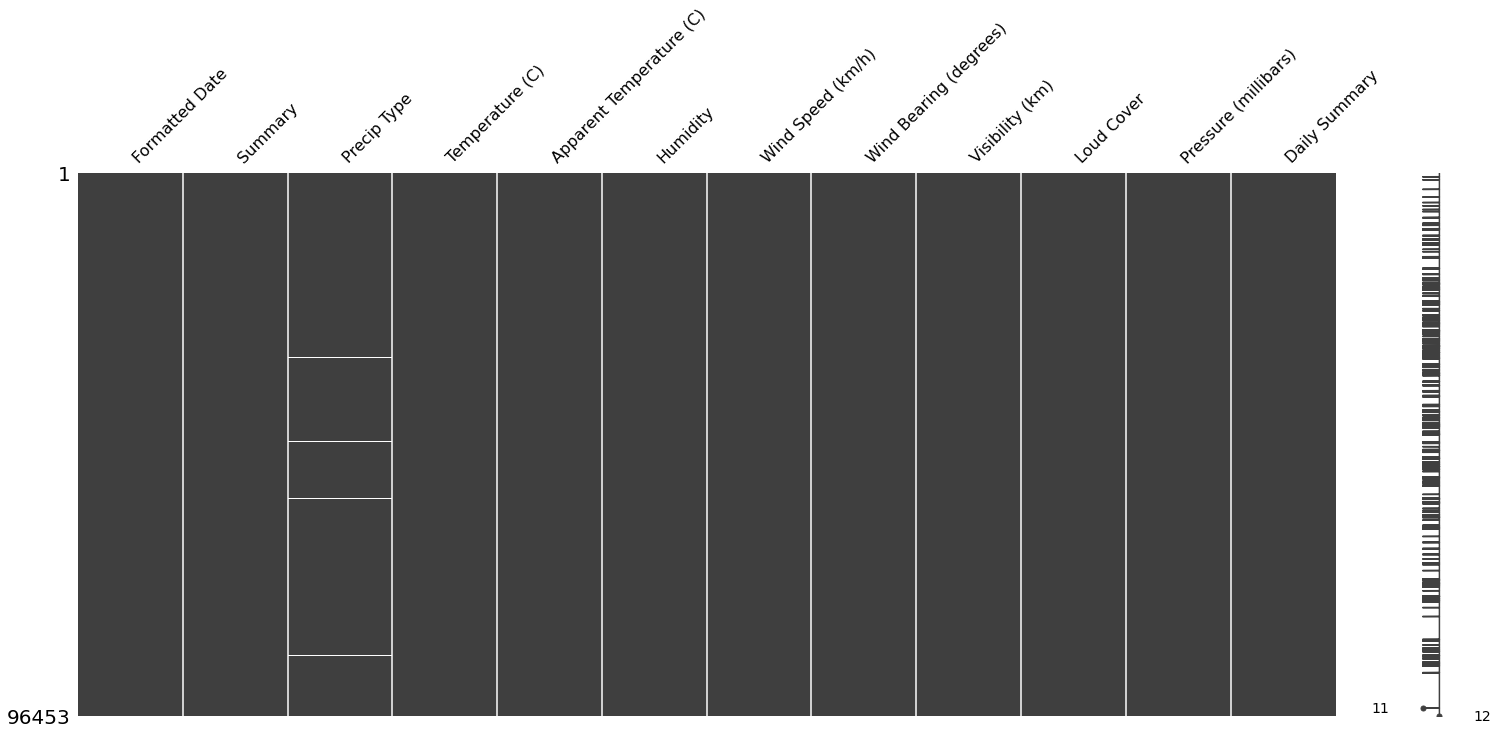

In [8]:
# lets see the distribution of missing values in the Precip Type
import missingno as msno

msno.matrix(weather_df.sort_values(by=['Humidity']));

In [12]:
print('The precentage of missing values is' ,512/ 96453)

The precentage of missing value is 0.0053082848641307166


In [13]:
# the missing values precentage is small so we can drop it.
# remove missing data
weather_df.dropna(inplace=True)

In [14]:
# let's check if there any duplicates
weather_df.duplicated().sum()

24

### there are 24 duplicate row in dataset

In [16]:
# Remove duplicated
weather_df.drop_duplicates(inplace=True)

In [17]:
# Check
weather_df.duplicated().sum()

0

In [18]:
# get the main statistic of the data
weather_df.describe().T

count         mean         std        min  \
Temperature (C)           95912.0    11.937975    9.569620 -21.822222   
Apparent Temperature (C)  95912.0    10.859194   10.716711 -27.716667   
Humidity                  95912.0     0.734844    0.195717   0.000000   
Wind Speed (km/h)         95912.0    10.806764    6.920504   0.000000   
Wind Bearing (degrees)    95912.0   187.506986  107.378309   0.000000   
Visibility (km)           95912.0    10.362306    4.174204   0.000000   
Loud Cover                95912.0     0.000000    0.000000   0.000000   
Pressure (millibars)      95912.0  1003.146959  117.291484   0.000000   

                                  25%          50%          75%          max  
Temperature (C)              4.594444    12.022222    18.844444    39.905556  
Apparent Temperature (C)     2.272222    12.022222    18.844444    39.344444  
Humidity                     0.600000     0.780000     0.890000     1.000000  
Wind Speed (km/h)            5.812100     9.933700    14.135800    63.852600  
Wind Bearing (degrees)     116.000000   180.000000   290.000000   359.000000  
Visibility (km)              8.355900    10.046400    14.812000    16.100000  
Loud Cover                   0.000000     0.000000     0.000000     0.000000  
Pressure (millibars)      1011.890000  1016.420000  1021.050000  1046.380000

### We can notice that load cover column is just zeros so we will drop it
 ### also pressure has zero values instead of nulls


In [20]:
# drop Loud cover
weather_df.drop(columns=['Loud Cover'], inplace=True)

In [24]:
weather_df['Pressure (millibars)'].describe()

count    95912.000000
mean      1016.796439
std          7.718585
min        973.780000
25%       1012.190000
50%       1016.420000
75%       1021.050000
max       1046.380000
Name: Pressure (millibars), dtype: float64

In [25]:
# replace pressure Zero values (missing values) with medium
weather_df['Pressure (millibars)'].replace(to_replace=[0], value=[weather_df['Pressure (millibars)'].median()], inplace=True)

In [26]:
# check the difference between summary and Daily summary
weather_df[['Summary','Daily Summary']]

Summary                           Daily Summary
0      Partly Cloudy       Partly cloudy throughout the day.
1      Partly Cloudy       Partly cloudy throughout the day.
2      Mostly Cloudy       Partly cloudy throughout the day.
3      Partly Cloudy       Partly cloudy throughout the day.
4      Mostly Cloudy       Partly cloudy throughout the day.
...              ...                                     ...
96448  Partly Cloudy  Partly cloudy starting in the morning.
96449  Partly Cloudy  Partly cloudy starting in the morning.
96450  Partly Cloudy  Partly cloudy starting in the morning.
96451  Partly Cloudy  Partly cloudy starting in the morning.
96452  Partly Cloudy  Partly cloudy starting in the morning.

[95912 rows x 2 columns]

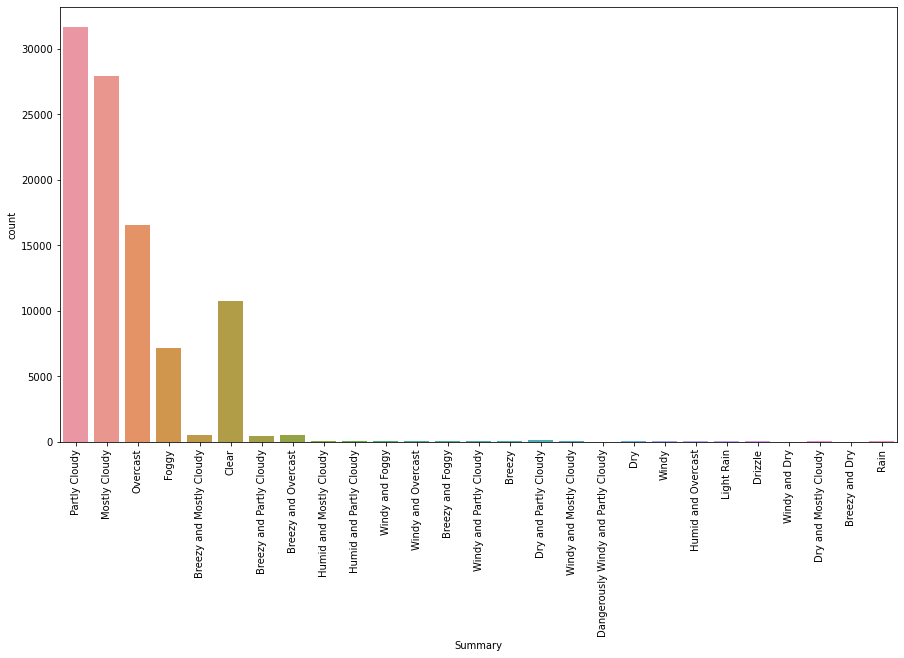

In [27]:
plt.subplots(figsize=(15,8))
sns.countplot(x='Summary', data=weather_df)
plt.xticks(rotation=90);

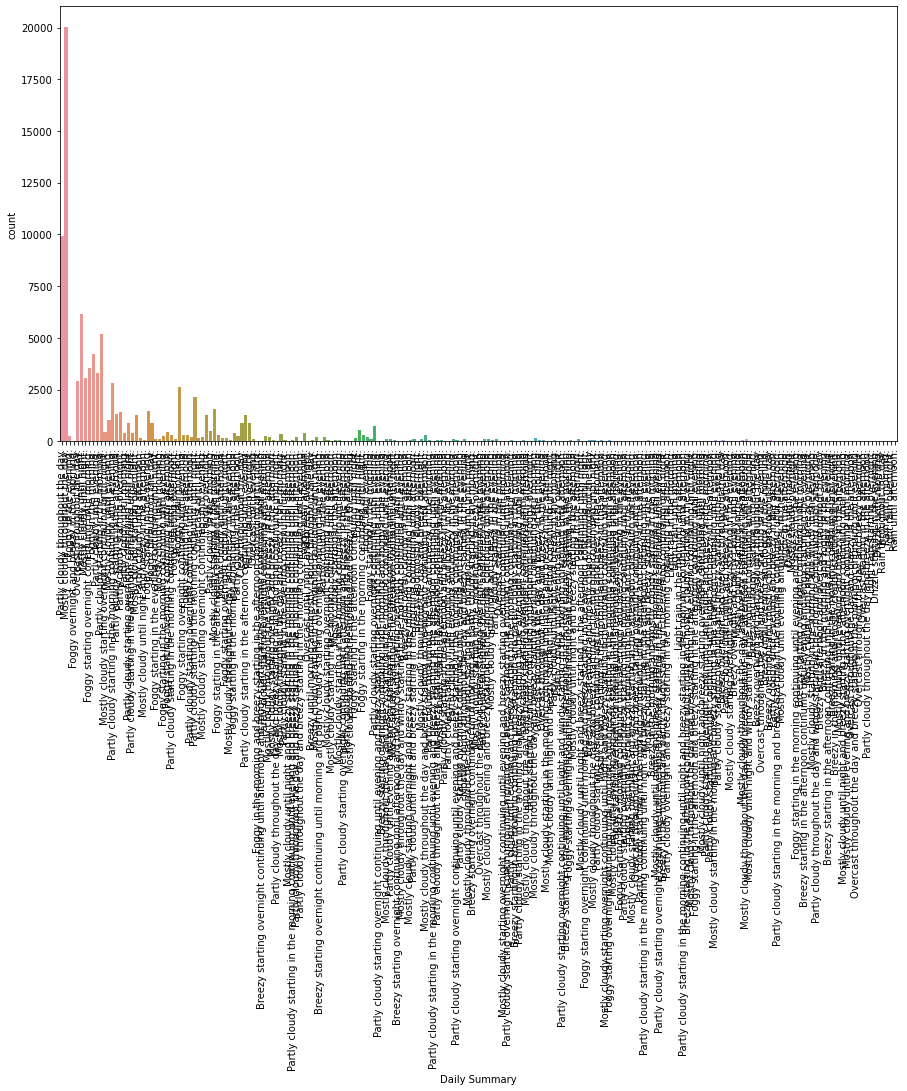

In [28]:
plt.subplots(figsize=(15,8))
sns.countplot(x='Daily Summary', data=weather_df)
plt.xticks(rotation=90);

In [29]:
### we can drop Daily Summary column
weather_df.drop(columns=['Daily Summary'], inplace=True)

In [30]:
# working with date
weather_df['Formatted Date'] = pd.to_datetime(weather_df['Formatted Date'], utc=True)

In [31]:
# check
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95912 non-null  datetime64[ns, UTC]
 1   Summary                   95912 non-null  object             
 2   Precip Type               95912 non-null  object             
 3   Temperature (C)           95912 non-null  float64            
 4   Apparent Temperature (C)  95912 non-null  float64            
 5   Humidity                  95912 non-null  float64            
 6   Wind Speed (km/h)         95912 non-null  float64            
 7   Wind Bearing (degrees)    95912 non-null  float64            
 8   Visibility (km)           95912 non-null  float64            
 9   Pressure (millibars)      95912 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(2)
memory usage: 10.1+ MB


In [32]:
# get the month and hour from date
weather_df['month'] = weather_df['Formatted Date'].dt.month
weather_df['hour'] = weather_df['Formatted Date'].dt.hour

<a id="4"></a>
# Data Inspection

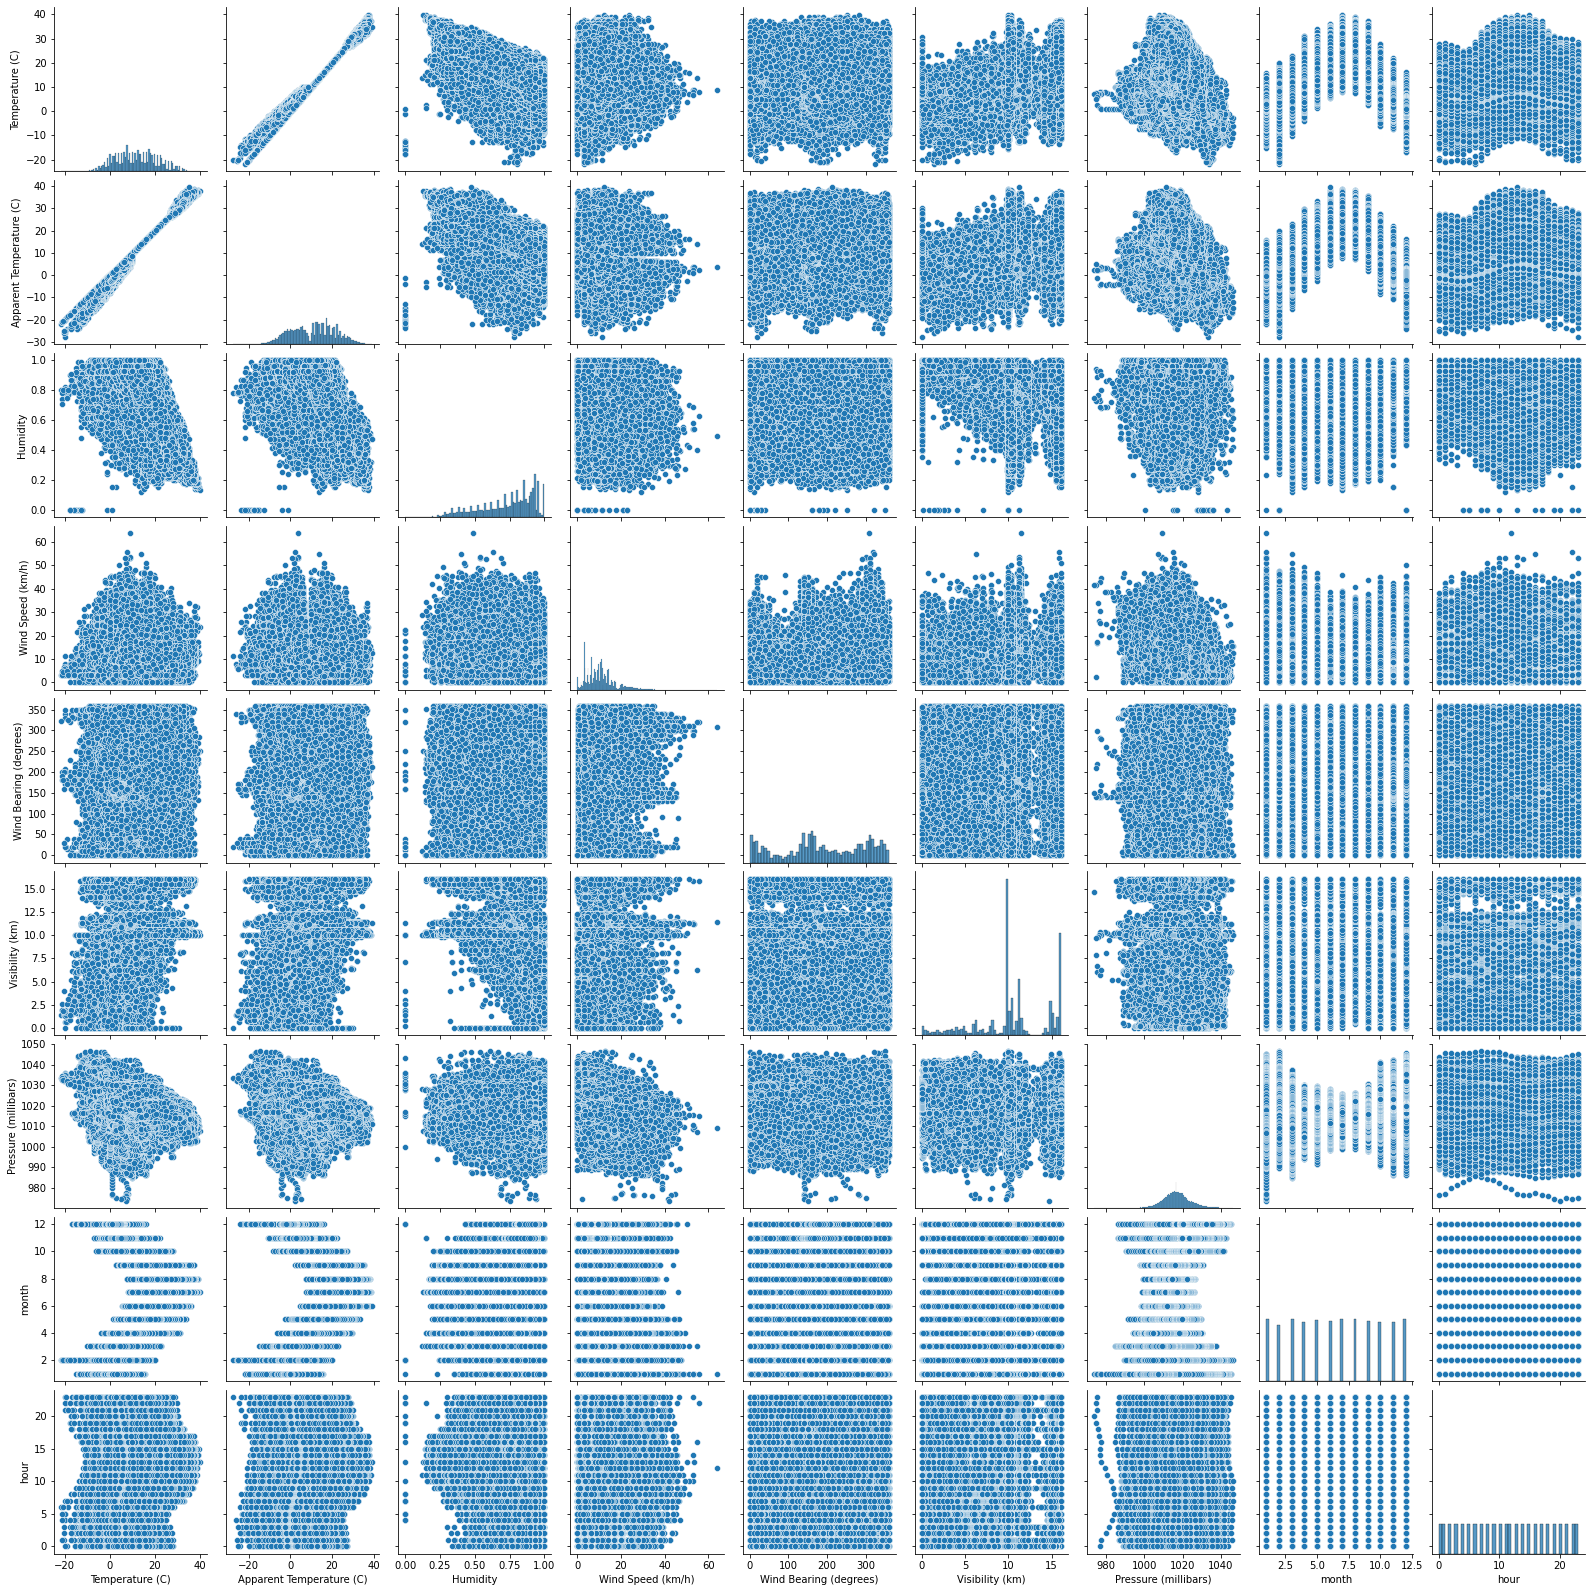

In [33]:
# lets start with pairplot
sns.pairplot(data=weather_df);

In [34]:
### we can see that there is a strong linear releation between temperature and  Aperant temperature

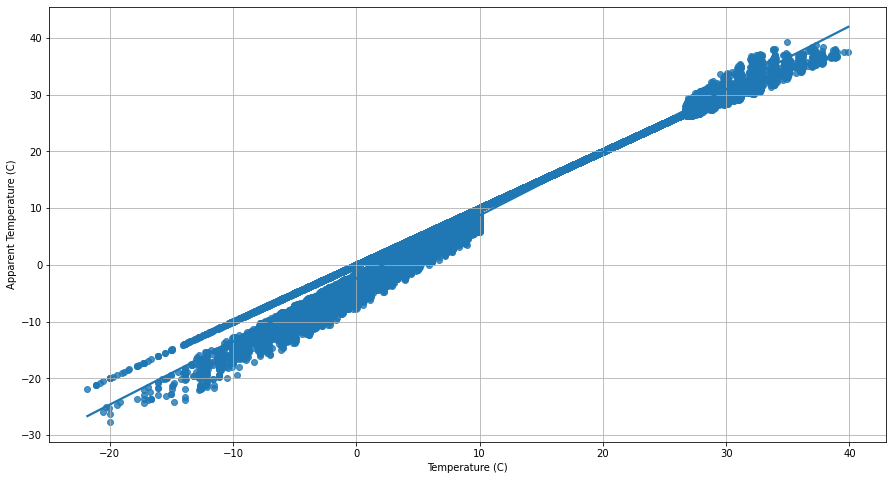

In [35]:
plt.subplots(figsize=(15,8))
sns.regplot(x='Temperature (C)', y='Apparent Temperature (C)', data=weather_df)
plt.grid();

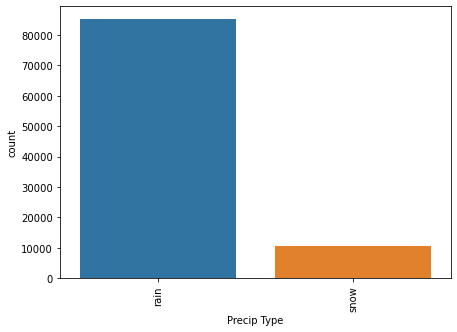

In [36]:
plt.subplots(figsize=(7,5))
sns.countplot(x='Precip Type', data=weather_df)
plt.xticks(rotation=90);

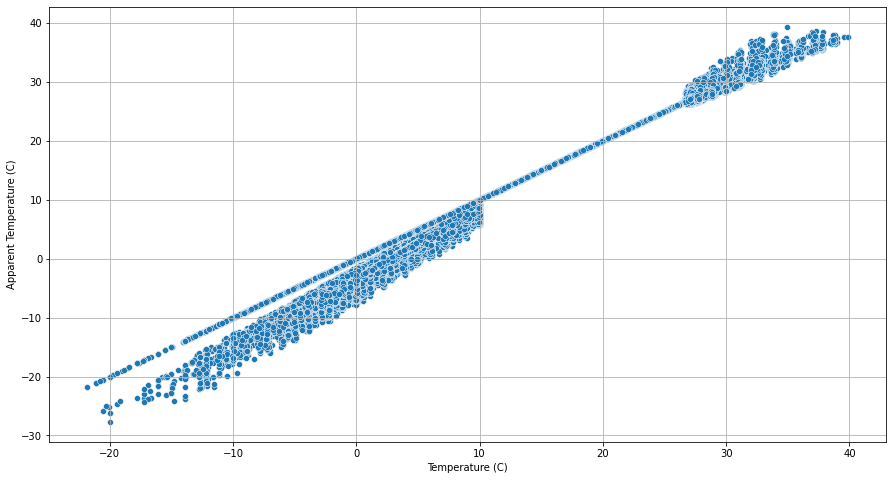

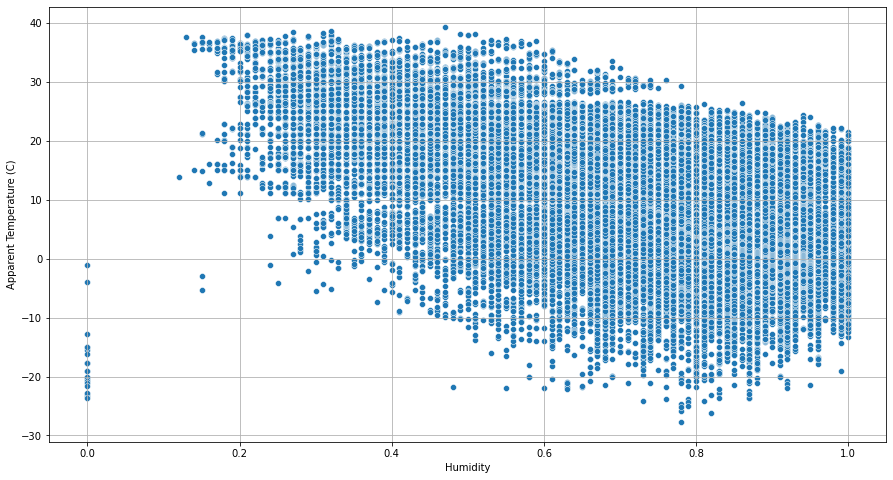

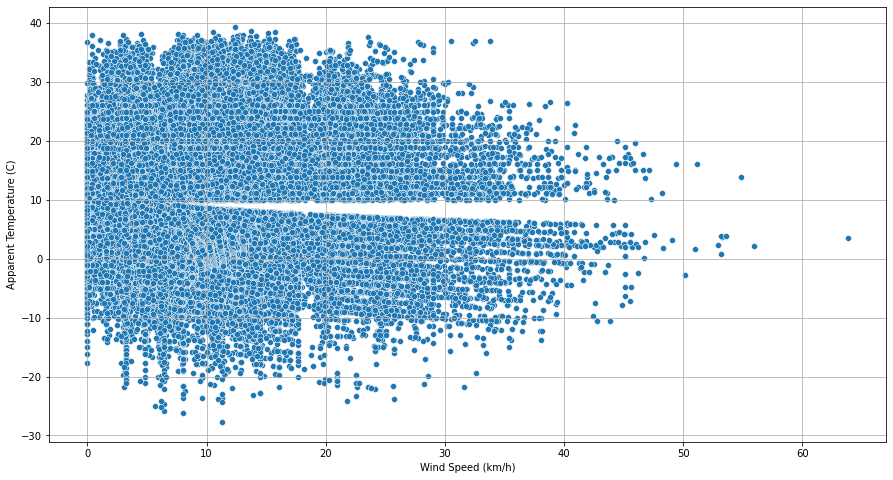

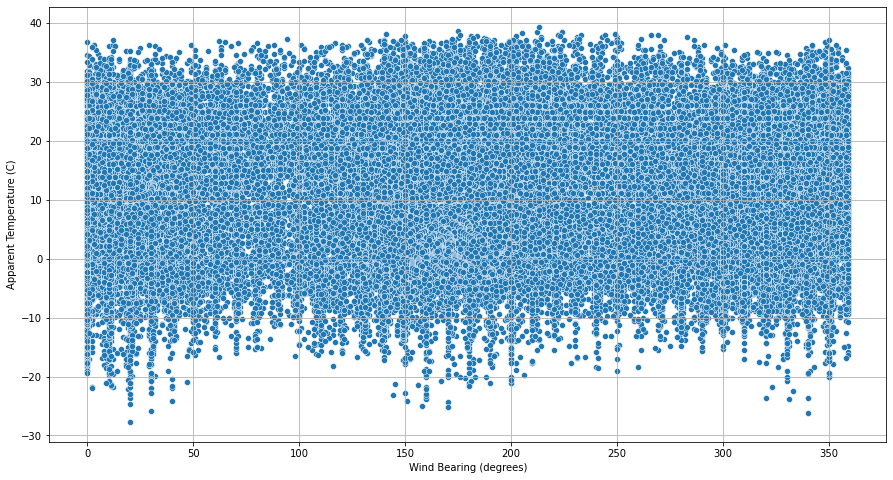

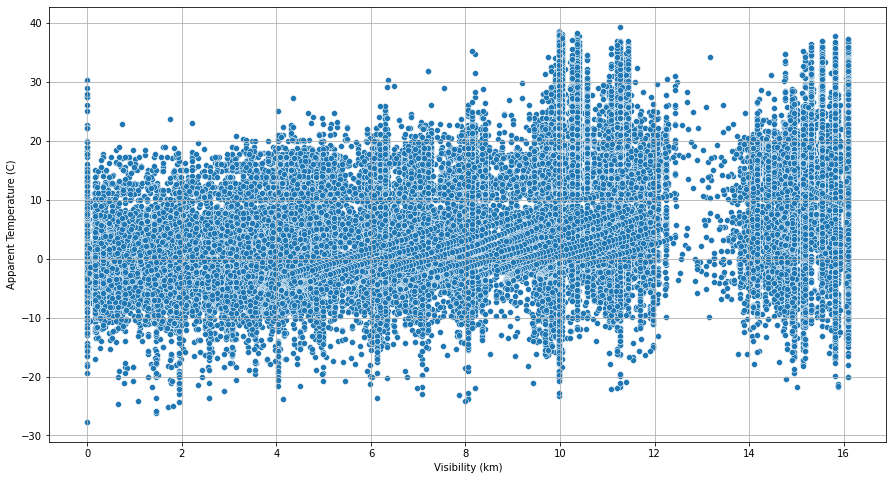

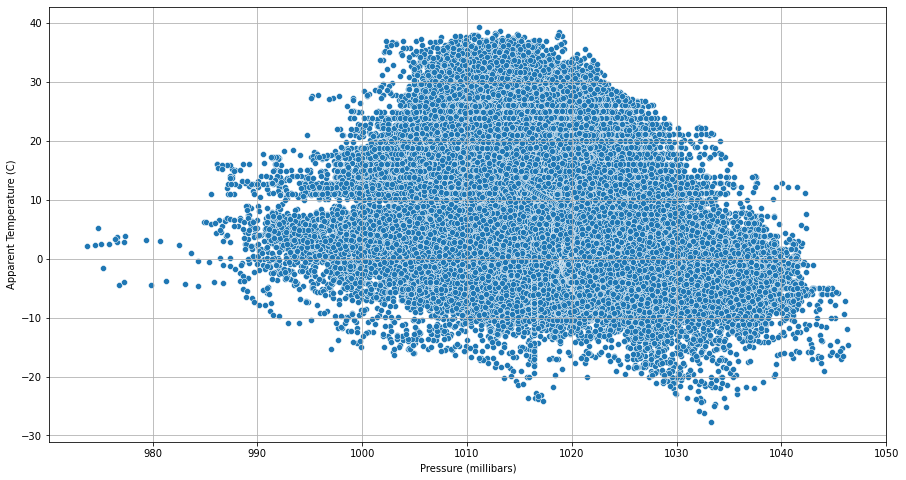

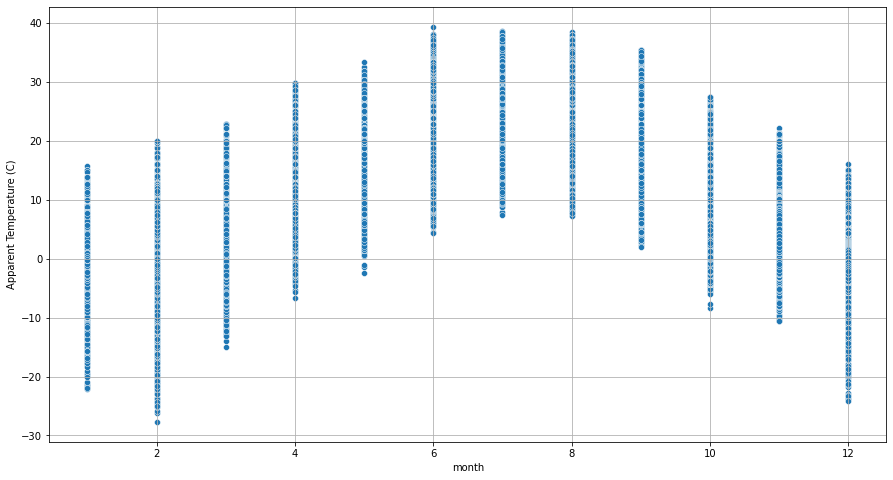

In [37]:
columns_lst = ['Temperature (C)','Humidity', 'Wind Speed (km/h)',
               'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
               'month']
for feature in columns_lst:
    plt.subplots(figsize=(15,8))
    sns.scatterplot(x=feature, y='Apparent Temperature (C)', data=weather_df)
    plt.grid();

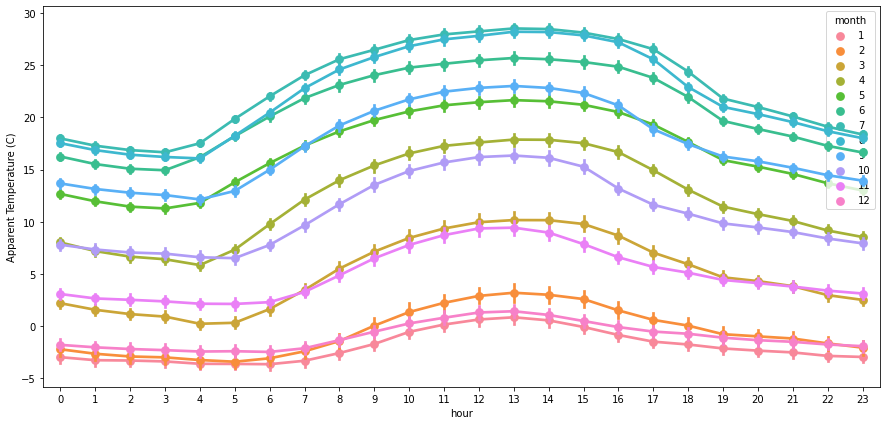

In [38]:
fig = plt.subplots(figsize=(15,7))
sns.pointplot(x='hour', y='Apparent Temperature (C)', data=weather_df, hue='month');

<a id="5"></a>
# Save the cleaned data

In [39]:
# save cleaned data as csv file
weather_df.to_csv('01_weatherHistory_cleaned.csv', index=False)